In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_json('cleaned_data.json', orient='columns')
df.head()

,Name,Address,Author,Price,Bedrooms,Showers,Parking,Furnish,Total Developed,Features,...,Nearby Places,URL,Timestamp,City,Region,Island,Type,NFeatures,NFacilities,NNearby Places
0,"3 BR Condo in The Grand Midori Ortigas, Pasig",,"Federal Land, Inc.",29700000,3,3.0,2,0,107.0,"[Ensuite, Range Hood, Stove/Burner]",...,"[School, Hospital]",https://propertyaccess.ph/property/3-br-condo-...,2022-10-23,Pasig,National Capital Region,Luzon,Condo,3,11,2
1,"1 Bedroom Condo in The Grand Midori Ortigas, P...",,"Federal Land, Inc.",10200000,1,1.0,0,0,46.0,[Fiber ready],...,"[School, Hospital]",https://propertyaccess.ph/property/1br-condo-i...,2022-10-23,Pasig,National Capital Region,Luzon,Condo,1,11,2
2,"3 Bedroom Condo in Aurelia Residences, Taguig","McKinley Parkway, Taguig, Metro Manila",Shang Properties,107300000,3,4.0,2,0,242.0,"[Central air conditioning, Balcony, Built-in w...",...,"[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/3-bedroom-c...,2022-10-23,Taguig,National Capital Region,Luzon,Condo,10,15,4
3,3 Bedroom Condo in Shang Residences at Wack Wa...,"Wack Wack Road, Mandaluyong, Metro Manila",Shang Properties,54500000,3,4.0,3,0,231.0,"[Central air conditioning, Balcony, Built-in w...",...,"[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/3-bedroom-c...,2022-10-23,Mandaluyong,National Capital Region,Luzon,Condo,9,16,4
4,"2BR Condo in Residences at The Galleon, Pasig",,Ortigas Land,41500000,2,2.0,2,0,109.0,"[Central air conditioning, Balcony, Built-in w...",...,"[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/2br-condo-i...,2022-10-23,Pasig,National Capital Region,Luzon,Condo,7,14,4


### EDA#1: How many condos and houses are there in each per city, region and island?

#### City

Text(0.5, 1.0, 'Amount of Condo and Houses in top 25 cities')

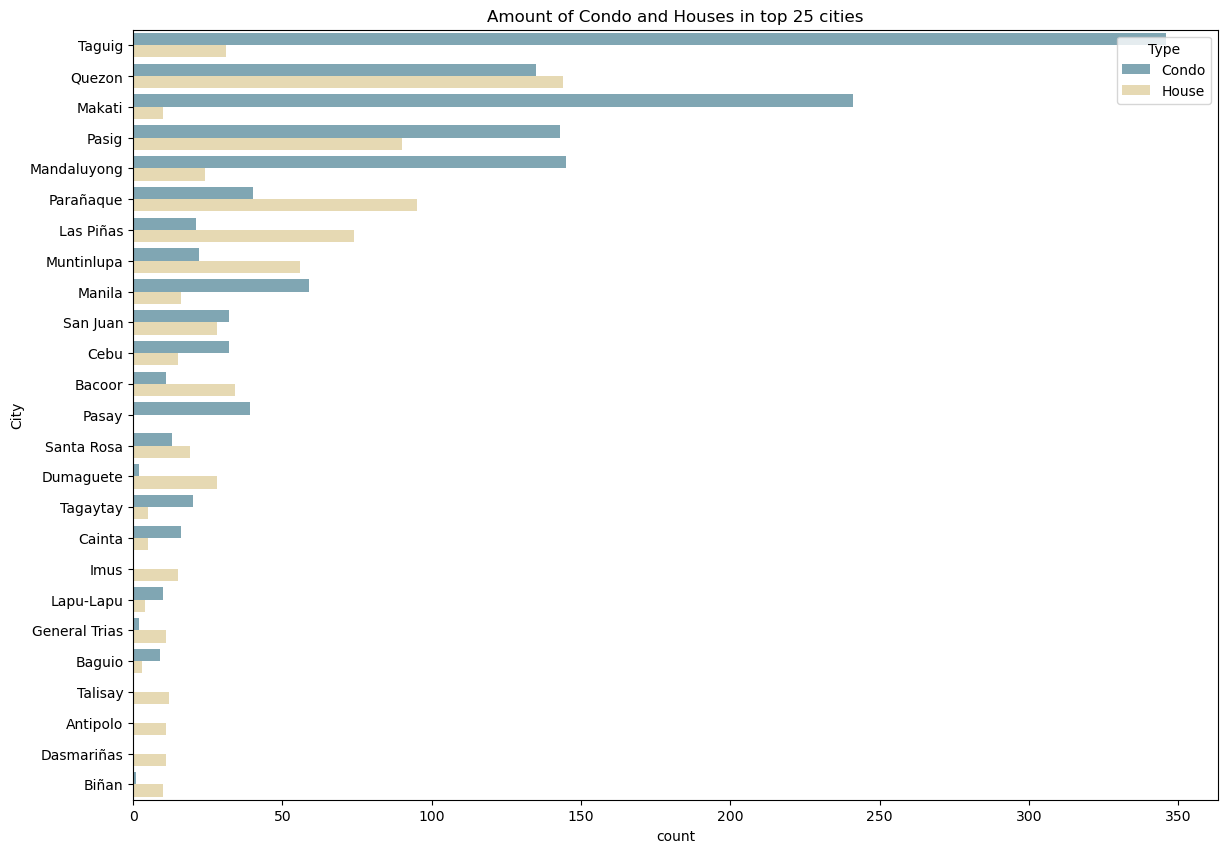

In [3]:
plt.figure(figsize=(14,10))
top_25_cities = df['City'].value_counts().index[:25]
top_25_df = df[df['City'].isin(top_25_cities)]
sns.countplot(data=top_25_df, y='City', hue='Type', palette="blend:#7AB,#EDA", order=top_25_cities)
plt.title('Amount of Condo and Houses in top 25 cities')

#### Findings: 
The bar chart contains the top 25 cities with most properties listed. The cities are sorted in a descending order based on the total amount of properties within them. However, the amount of condos and houses are seperately plotted. As can be seen the top 10 cities with most amount of listed properties are from Metro Manila. Among these, 7 out of 10 cities has more condos compared to houses. On the other hand, 8 out of 14 cities from top 11 to 24 has more houses compared to condos.

#### Region

Text(0.5, 1.0, 'Amount of Condo and Houses in each Region')

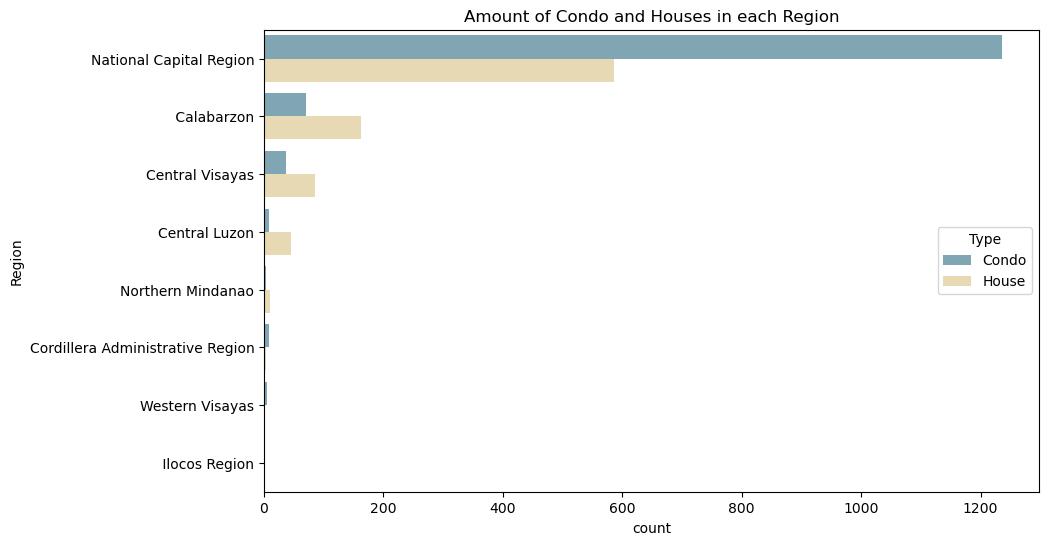

In [4]:
plt.figure(figsize=(10,6))
sorted_by_count = df.groupby('Region').count().sort_values('Type', ascending=False).index
sns.countplot(data=df, y='Region', hue='Type', palette="blend:#7AB,#EDA", order=sorted_by_count)
plt.title('Amount of Condo and Houses in each Region')

#### Findings: 
The regions are sorted based on the total amount of properties listed within it. It can clearly be seen that the NCR has the most amount of properties listed. However it is the only one aside from CAR and Western Visayas regions with more condo compared to houses.

#### Island

Text(0.5, 1.0, 'Amount of Condo and Houses in each Island')

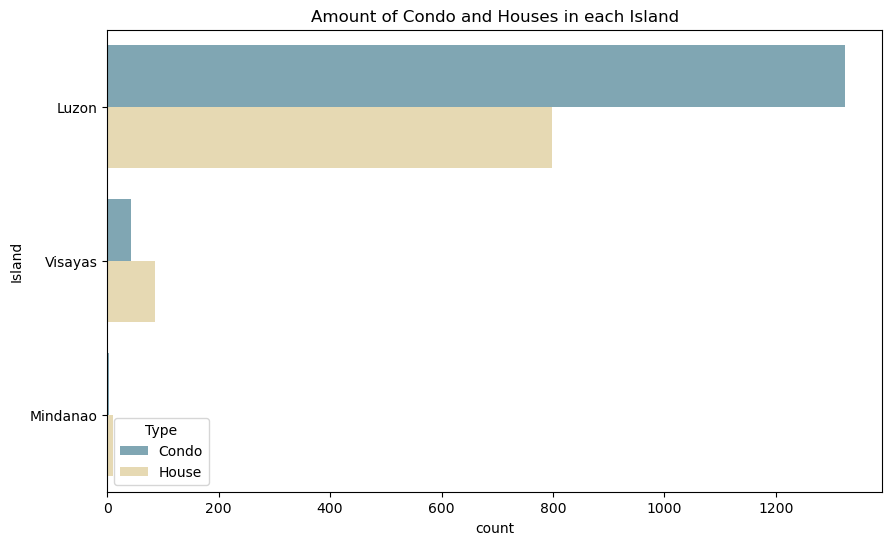

In [5]:
plt.figure(figsize=(10,6))
sorted_by_count = df.groupby('Island').count().sort_values('Type', ascending=False).index
sns.countplot(data=df, y='Island', hue='Type', palette="blend:#7AB,#EDA", order=sorted_by_count)
plt.title('Amount of Condo and Houses in each Island')

#### Findings: 
The islands are sorted based on the total amount of properties listed within it. It can be seen that there are so much more properties listed in Luzon compared to Visayas. Only Luzon has more condos compared to houses, in visayas and mindanao, there are more houses compared to condos.

### EDA#2: What is the price range of condos and houses per city, region and island?

#### City

Text(0.5, 1.0, 'Price Range of Condos and Houses in top 25 cities')

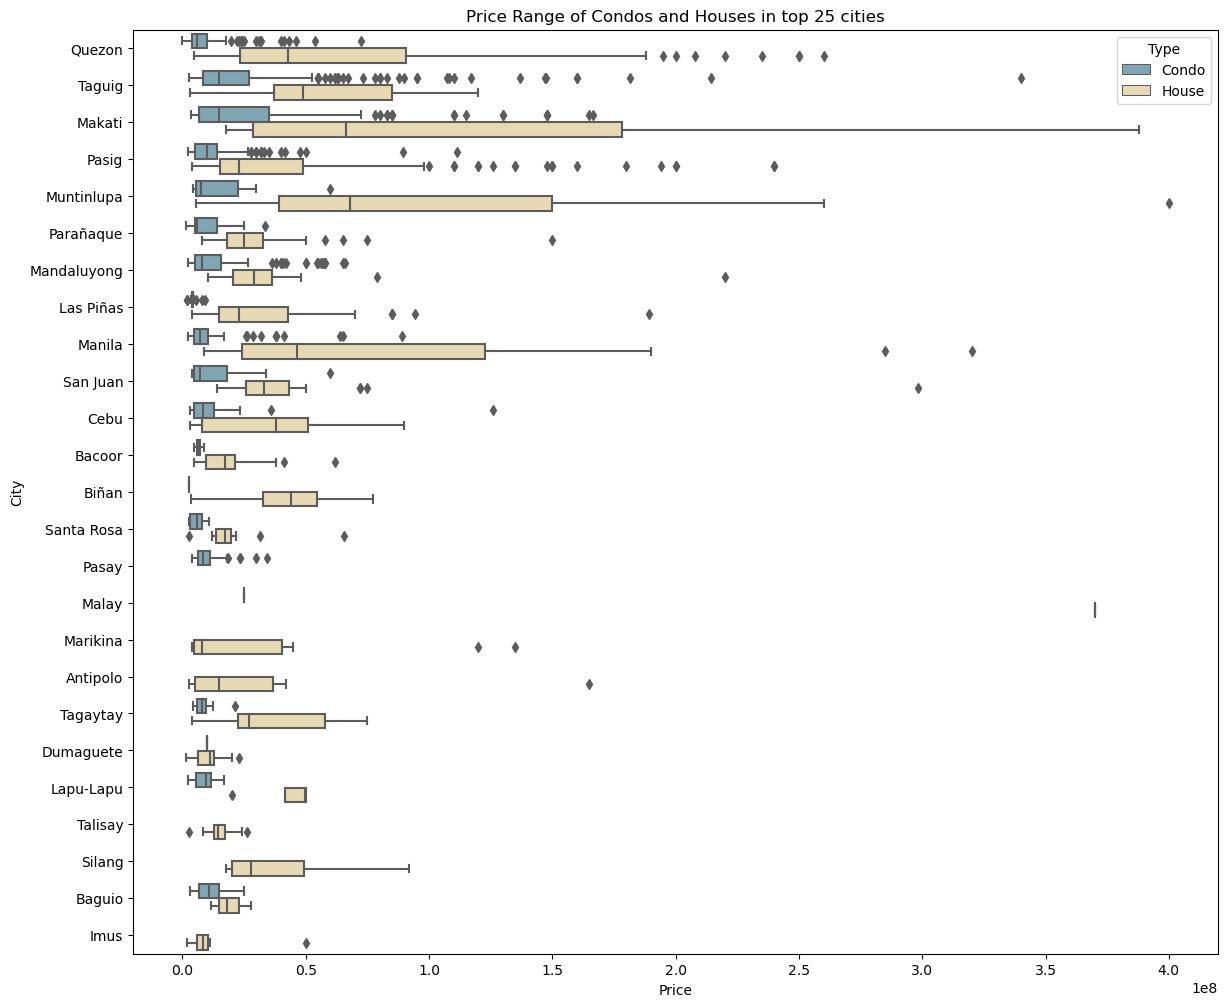

In [6]:
plt.figure(figsize=(14,12))
top_25_cities = df.groupby('City').sum().sort_values('Price', ascending=False).index[:25]
top_25_df = df[df['City'].isin(top_25_cities)]
sns.boxplot(data=df, x='Price', y='City', hue='Type', palette="blend:#7AB,#EDA", order=top_25_cities)
plt.title('Price Range of Condos and Houses in top 25 cities')

#### Findings: 

The price range of houses are shown by using a box plot based on the prices of the listed properties on top 25 cities with most expensive houses. The cities are sorted based on the total price of properties in that city. Among the listed properties, almost all of the houses in each city are generally more expensive compared to condos. Finally, the top 10 of cities with the most expensive overall, are from Metro Manila.

#### Region

Text(0.5, 1.0, 'Price Range of Condos and Houses in each Region')

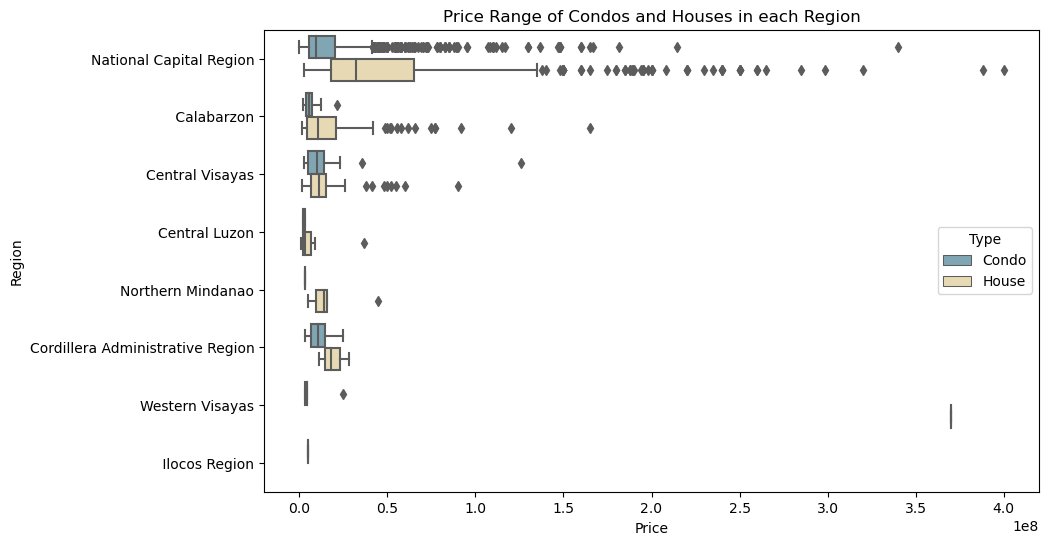

In [7]:
plt.figure(figsize=(10,6))
sorted_by_count = df.groupby('Region').count().sort_values('Type', ascending=False).index
sns.boxplot(data=df, x='Price', y='Region', hue='Type', palette="blend:#7AB,#EDA", order=sorted_by_count)
plt.title('Price Range of Condos and Houses in each Region')

#### Findings: 

The NCR has the highest price ranges out of all. Only Central Visayas has the almost the same price range between condos and houses. All the other regions have higher price on the houses compared to condos.

#### Island

Text(0.5, 1.0, 'Price Range of Condos and Houses in each Island')

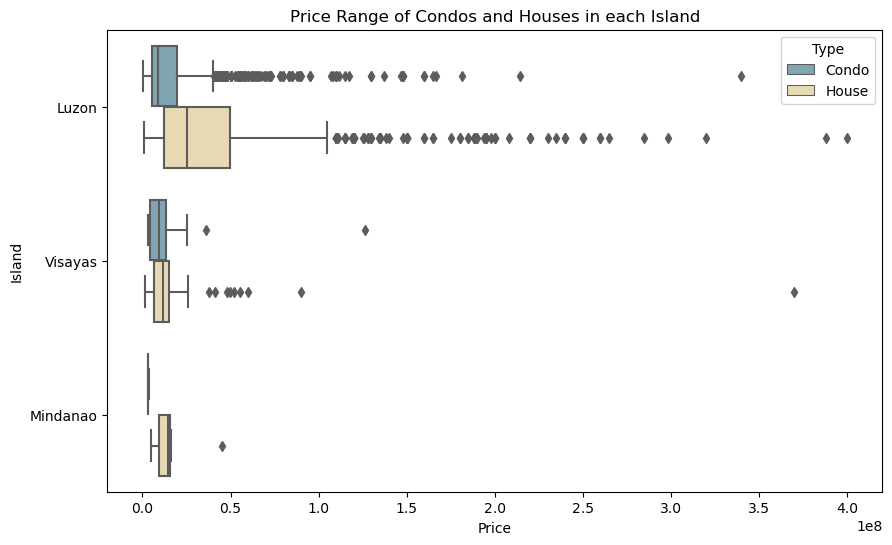

In [8]:
plt.figure(figsize=(10,6))
sorted_by_count = df.groupby('Island').count().sort_values('Type', ascending=False).index
sns.boxplot(data=df, x='Price', y='Island', hue='Type', palette="blend:#7AB,#EDA", order=sorted_by_count)
plt.title('Price Range of Condos and Houses in each Island')

#### Findings: 
It can be seen that Visayas has almost equal price range between condos and houses. Luzon has the most expensive houses and condos however, like Mindanao, Luzon also has higher price range when it comes to houses compared to condos.

### EDA#3: What is the median price of condos and houses per city, region and island?

#### City - House

In [9]:
r1city = df.groupby(['Type', 'City', 'Island'])['Price'].median().sort_values(ascending=False).reset_index()
r1city

,Type,City,Island,Price
0,House,Malay,Visayas,370000000.0
1,House,Muntinlupa,Luzon,68000000.0
2,House,Makati,Luzon,66500000.0
3,House,Lapu-Lapu,Luzon,49500000.0
4,House,Taguig,Luzon,48800000.0
...,...,...,...,...
97,Condo,San Jose Del Monte,Luzon,2200000.0
98,House,Mabalacat,Luzon,1913500.0
99,House,San Jose Del Monte,Luzon,1834000.0
100,House,Pampanga,Luzon,1700000.0


In [10]:
r1cityhouse = r1city[r1city.Type == "House"]
r1cityluzon = r1cityhouse[r1cityhouse.Island == "Luzon"]
luzon_ten = r1cityluzon.head(10)
luzon_ten

,Type,City,Island,Price
1,House,Muntinlupa,Luzon,68000000.0
2,House,Makati,Luzon,66500000.0
3,House,Lapu-Lapu,Luzon,49500000.0
4,House,Taguig,Luzon,48800000.0
5,House,Manila,Luzon,46400000.0
6,House,Biñan,Luzon,44215500.0
7,House,Quezon,Luzon,43000000.0
9,House,San Juan,Luzon,33275000.0
10,House,Laguna,Luzon,31800000.0
11,House,Mandaluyong,Luzon,28825000.0


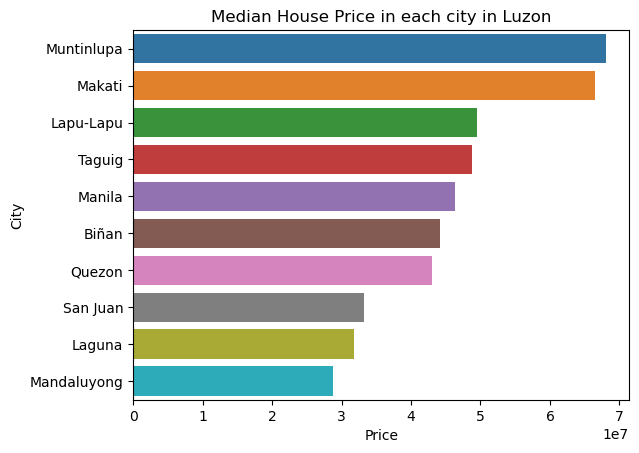

In [11]:
sns.barplot(x = luzon_ten["Price"], y = luzon_ten["City"], dodge=False, ci=None)
plt.xlabel("Price")
plt.ylabel("City")
plt.title("Median House Price in each city in Luzon")
plt.show()

In [12]:
r1cityvisayas = r1cityhouse[r1cityhouse.Island == "Visayas"]
visayas_ten = r1cityvisayas.head(10)
visayas_ten

,Type,City,Island,Price
0,House,Malay,Visayas,370000000.0
8,House,Cebu,Visayas,38000000.0
19,House,Dauin,Visayas,21750000.0
29,House,Talisay,Visayas,14380000.0
31,House,Consolacion,Visayas,11000000.0
32,House,Dumaguete,Visayas,11000000.0
36,House,Bacong,Visayas,10500000.0
39,House,Negros Island Region,Visayas,10000000.0
42,House,Mandaue,Visayas,8500000.0
48,House,Danao,Visayas,8000000.0


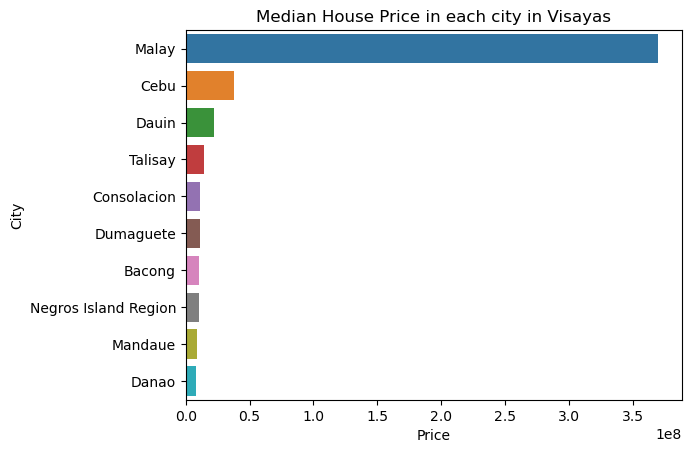

In [13]:
sns.barplot(x = visayas_ten["Price"], y = visayas_ten["City"], dodge=False, ci=None)
plt.xlabel("Price")
plt.ylabel("City")
plt.title("Median House Price in each city in Visayas")
plt.show()

In [14]:
r1citymindanao = r1cityhouse[r1cityhouse.Island == "Mindanao"]
mindanao_ten = r1citymindanao.head(10)
mindanao_ten

,Type,City,Island,Price
30,House,Valencia,Mindanao,14250000.0


#### City - Condo

In [15]:
r1citycondo = r1city[r1city.Type == "Condo"]
r1city_c_luzon = r1citycondo[r1citycondo.Island == "Luzon"]
luzon_c_ten = r1city_c_luzon.head(10)
luzon_c_ten

,Type,City,Island,Price
26,Condo,Makati,Luzon,15000000.0
27,Condo,Taguig,Luzon,15000000.0
33,Condo,Baguio,Luzon,10857025.0
38,Condo,Pasig,Luzon,10000000.0
40,Condo,Lapu-Lapu,Luzon,9428000.0
45,Condo,Pasay,Luzon,8311000.0
47,Condo,Tagaytay,Luzon,8021500.0
50,Condo,Mandaluyong,Luzon,8000000.0
52,Condo,Muntinlupa,Luzon,7500000.0
54,Condo,Manila,Luzon,7000000.0


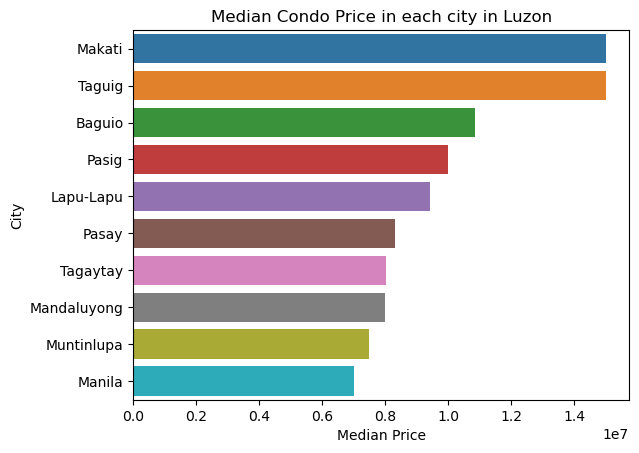

In [16]:
sns.barplot(x = luzon_c_ten["Price"], y = luzon_c_ten["City"], dodge=False, ci=None)
plt.xlabel("Median Price")
plt.ylabel("City")
plt.title("Median Condo Price in each city in Luzon")
plt.show()

In [17]:
r1city_c_visayas = r1citycondo[r1citycondo.Island == "Visayas"]
visayas_c_ten = r1city_c_visayas.head(10)
visayas_c_ten

,Type,City,Island,Price
16,Condo,Malay,Visayas,25000000.0
22,Condo,Dauin,Visayas,17500000.0
35,Condo,Mandaue,Visayas,10601000.0
37,Condo,Dumaguete,Visayas,10000000.0
43,Condo,Cebu,Visayas,8335000.0
74,Condo,Bacolod,Visayas,4317000.0
90,Condo,Iloilo,Visayas,3116500.0


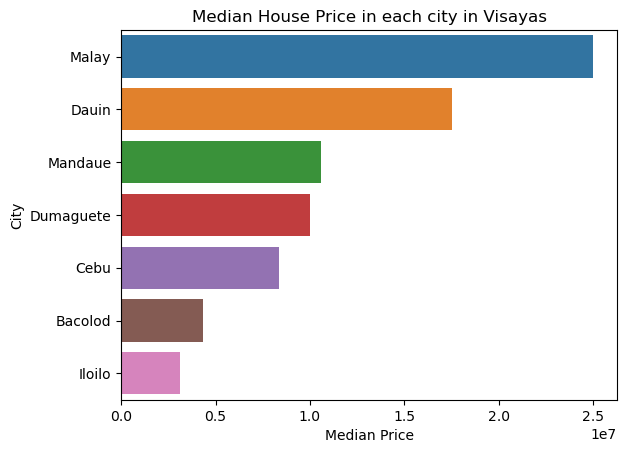

In [18]:
sns.barplot(x = visayas_c_ten["Price"], y = visayas_c_ten["City"], dodge=False, ci=None)
plt.xlabel("Median Price")
plt.ylabel("City")
plt.title("Median House Price in each city in Visayas")
plt.show()

In [19]:
r1city_c_mindanao = r1citycondo[r1citycondo.Island == "Mindanao"]
mindanao_c__ten = r1city_c_mindanao.head(10)
mindanao_c__ten

,Type,City,Island,Price
88,Condo,Cagayan de Oro,Mindanao,3271000.0


#### Findings:
Among all the cities in Luzon, makati has the largest median price in both houses and condos and among all the cities in Visayas, cebu has the largest median price in houses and malay  has the largest median price in condos

#### Region - House

In [20]:
r1region = df.groupby(['Type', 'Region'])['Price'].median().sort_values(ascending=False).reset_index()
r1region

,Type,Region,Price
0,House,Western Visayas,370000000.0
1,House,National Capital Region,32250000.0
2,House,Cordillera Administrative Region,18000000.0
3,House,Northern Mindanao,14250000.0
4,House,Central Visayas,11500000.0
5,Condo,Cordillera Administrative Region,10857025.0
6,House,Calabarzon,10800000.0
7,Condo,Central Visayas,10000000.0
8,Condo,National Capital Region,9671600.0
9,Condo,Calabarzon,5349540.0


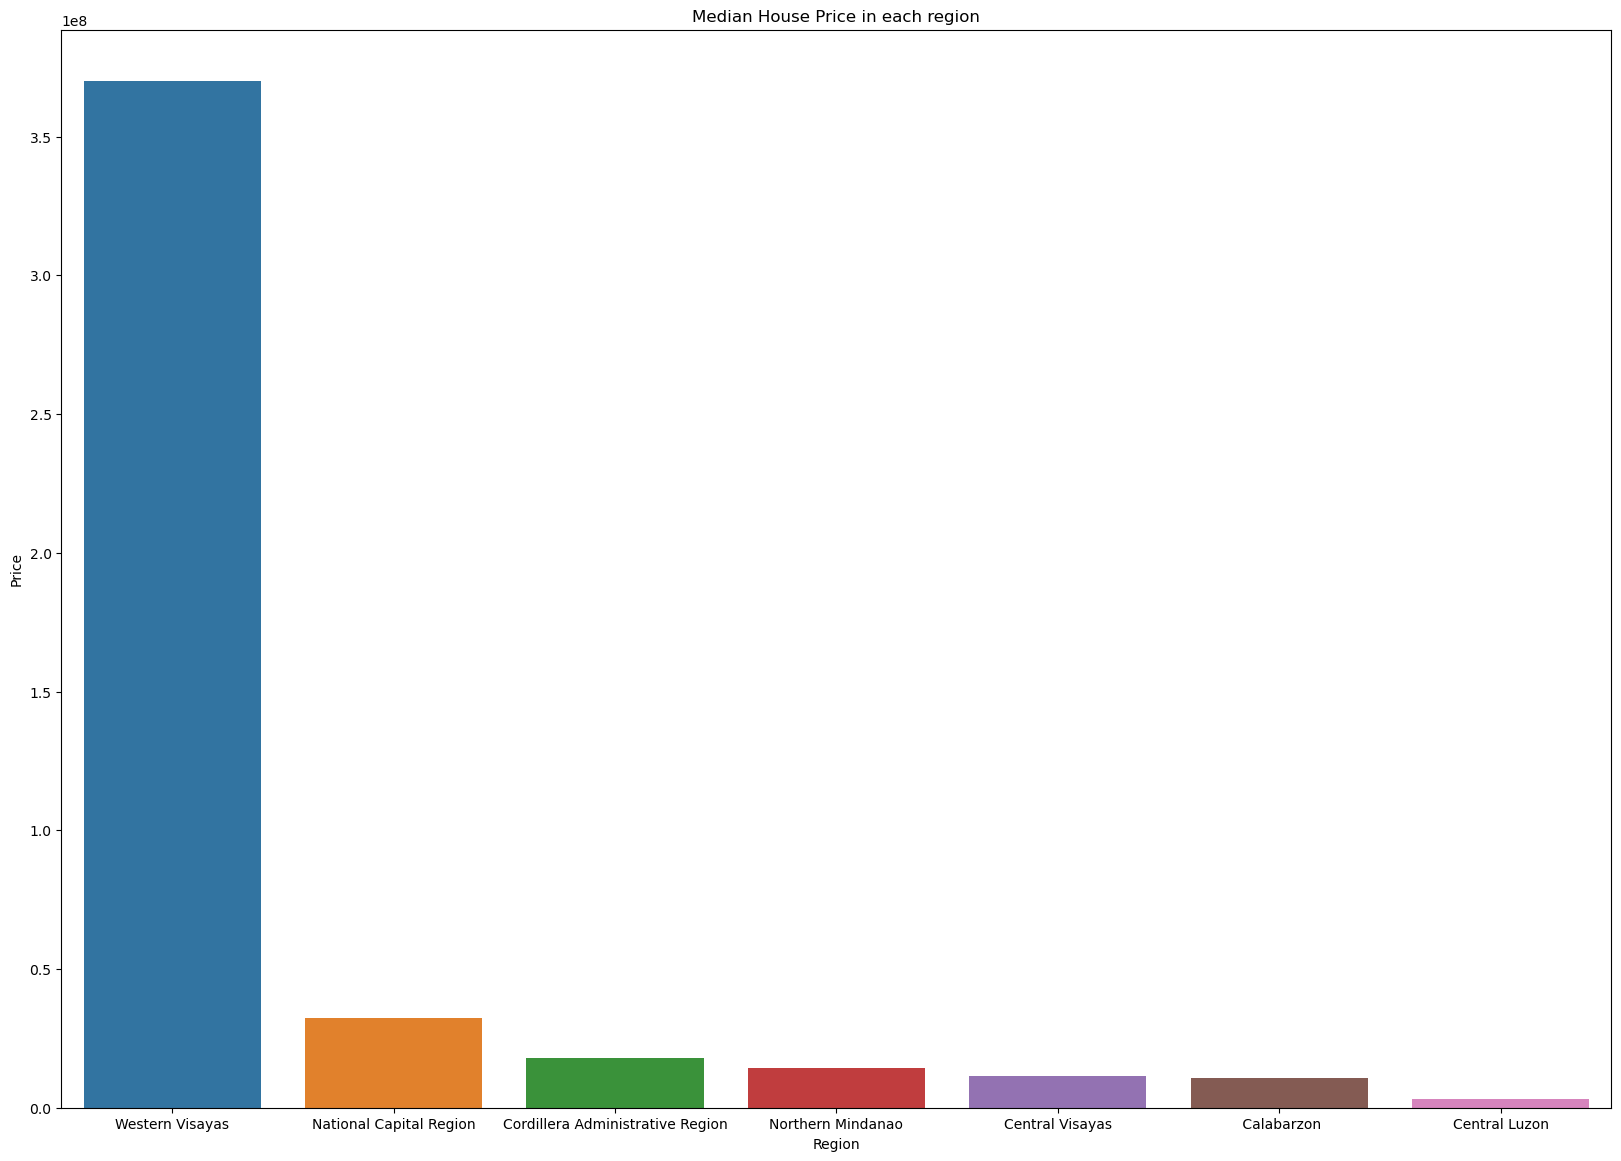

In [21]:
plt.figure(figsize=(20,14))
r1regionhouse = r1region[r1region.Type == "House"]
sns.barplot(x = r1regionhouse["Region"], y = r1regionhouse["Price"], dodge=False, ci=None)
plt.xlabel("Region")
plt.ylabel("Price")
plt.title("Median House Price in each region")
plt.show()

#### Region - Condo 

In [22]:
r1region = df.groupby(['Type', 'Region'])['Price'].median().sort_values(ascending=False).reset_index()

In [23]:
r1regioncondo = r1region[r1region.Type == "Condo"]
r1regioncondo

,Type,Region,Price
5,Condo,Cordillera Administrative Region,10857025.0
7,Condo,Central Visayas,10000000.0
8,Condo,National Capital Region,9671600.0
9,Condo,Calabarzon,5349540.0
10,Condo,Ilocos Region,5146266.0
11,Condo,Western Visayas,4255000.0
12,Condo,Northern Mindanao,3271000.0
14,Condo,Central Luzon,2885000.0


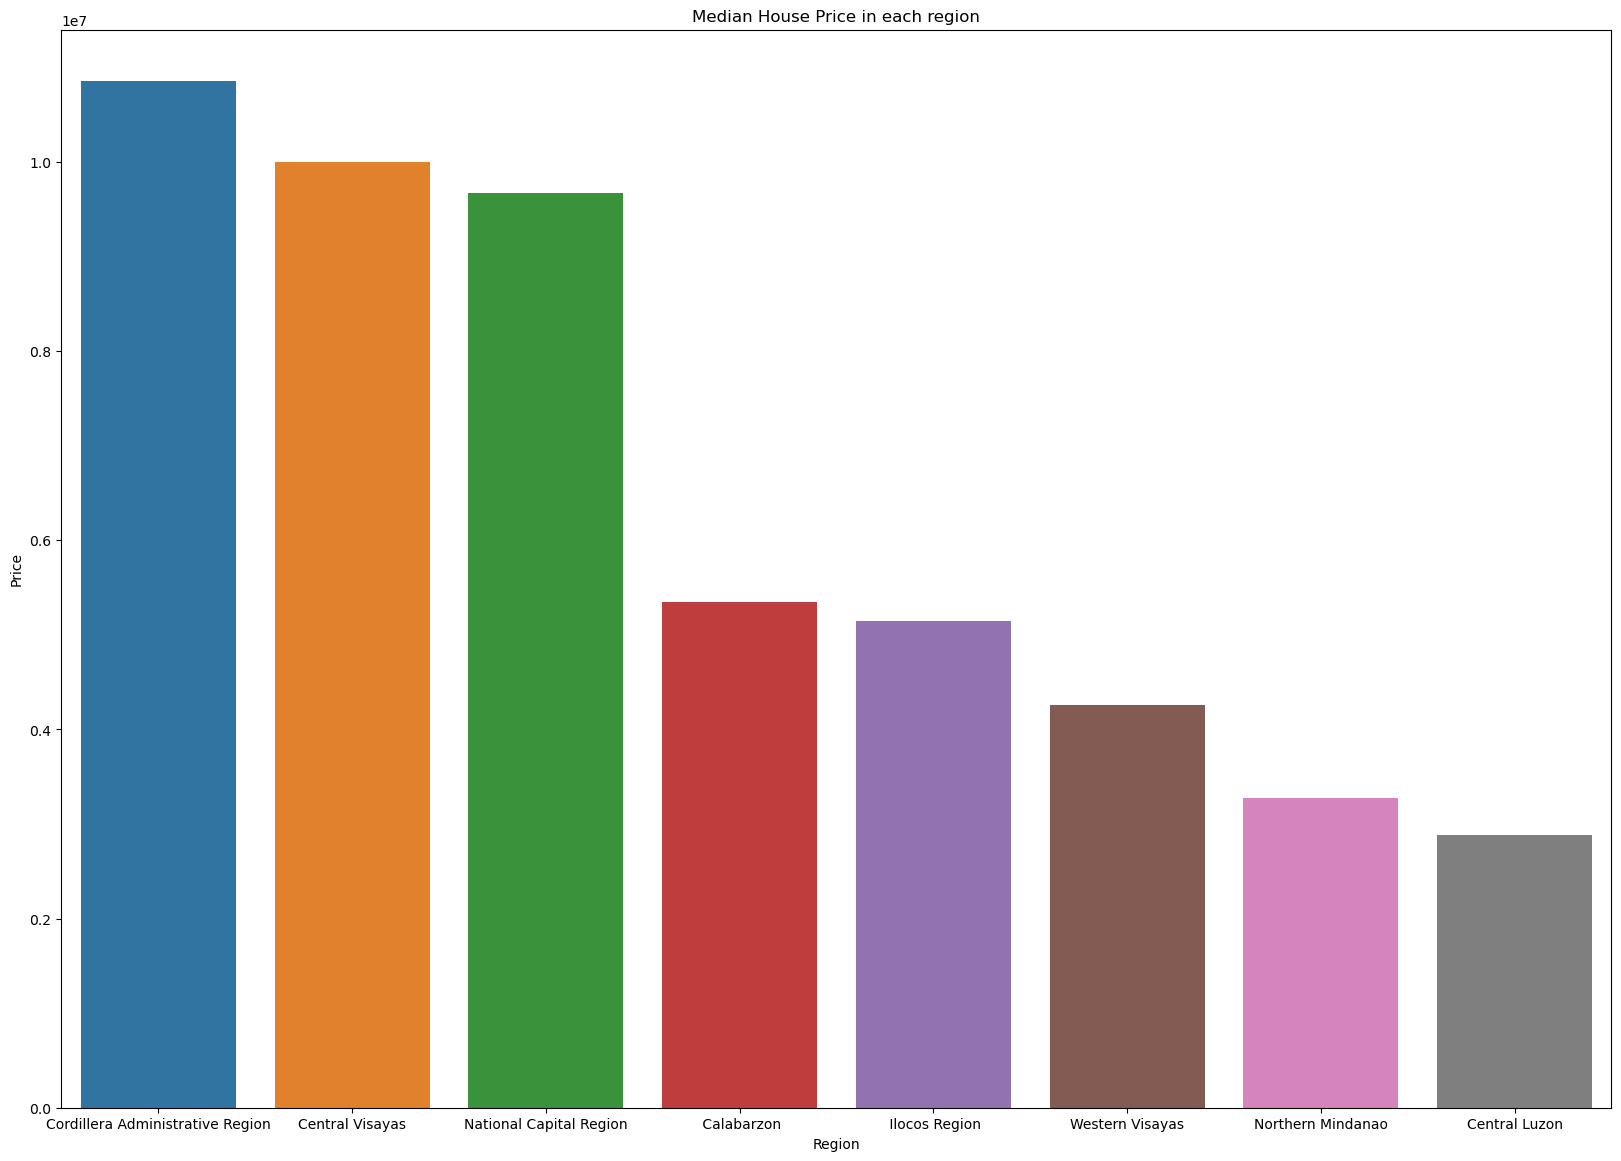

In [24]:
plt.figure(figsize=(20,14))
sns.barplot(x = r1regioncondo["Region"], y = r1regioncondo["Price"], dodge=False, ci=None)
plt.xlabel("Region")
plt.ylabel("Price")
plt.title("Median House Price in each region")
plt.show()

#### Findings: 
Grouping the data by region, we can see that NCR has the largest  median price in houses and cordillera administrative region  has the largest median price in condos

#### Island - House

In [25]:
r1island = df.groupby(['Type', 'Island'])['Price'].median().sort_values(ascending=False).reset_index()
r1island

,Type,Island,Price
0,House,Luzon,25000000.0
1,House,Mindanao,14250000.0
2,House,Visayas,11500000.0
3,Condo,Visayas,9235000.0
4,Condo,Luzon,9000000.0
5,Condo,Mindanao,3271000.0


In [26]:
colors={'Luzon':'red', 
        'Visayas':'green',
        'Mindanao':'blue'}

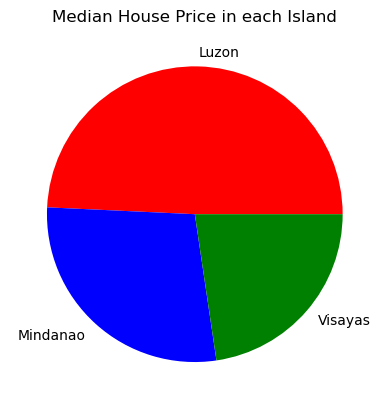

In [27]:
r1islandhouse = r1island[r1island.Type == "House"]
plt.title("Median House Price in each Island")
plt.pie(r1islandhouse["Price"], labels = r1islandhouse["Island"], colors=[colors[x] for x in r1islandhouse["Island"].value_counts().keys()])
plt.show()

#### Island - Condo

In [28]:
r1island = df.groupby(['Type', 'Island'])['Price'].median().sort_values(ascending=False).reset_index()

In [29]:
colors={'Luzon':'red', 
        'Visayas':'green',
        'Mindanao':'blue'}

In [30]:
r1islandcondo = r1island[r1island.Type == "Condo"]
r1islandcondo

,Type,Island,Price
3,Condo,Visayas,9235000.0
4,Condo,Luzon,9000000.0
5,Condo,Mindanao,3271000.0


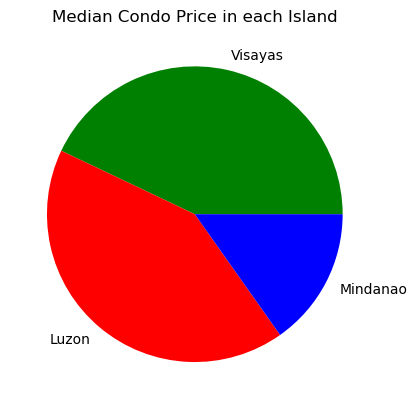

In [31]:
r1islandcondo = r1island[r1island.Type == "Condo"]
plt.pie(r1islandcondo["Price"], labels = r1islandcondo["Island"], colors=[colors[x] for x in r1islandcondo["Island"].value_counts().keys()])
plt.title("Median Condo Price in each Island")
plt.show()

#### Findings: 
Grouping the data by island, we can see that Luzon has the largest  median price in houses and visayas  has the largest median price in condos

### EDA#4: What is the median price of condos and houses of a given land developer? 

#### House

In [32]:
r2author = df[df.Type == "House"]
top_ten = r2author["Author"].value_counts().index[:10]
top_ten

top_ten_df = r2author[r2author['Author'].isin(top_ten)]
top_ten_df

r2author = top_ten_df.groupby('Author')['Price'].median().sort_values(ascending=False).reset_index()
r2author

,Author,Price
0,Angelique Toreja,85000000.0
1,Patricia Marquez,52000000.0
2,Raimund,46000000.0
3,Myra Malinao,28500000.0
4,Arlene Cadavedo,23000000.0
5,Monique Sison,18500000.0
6,Joshua Seastres,17841080.0
7,John,16500000.0
8,Henry Sedeño,13650000.0
9,Jake Lacson,11500000.0


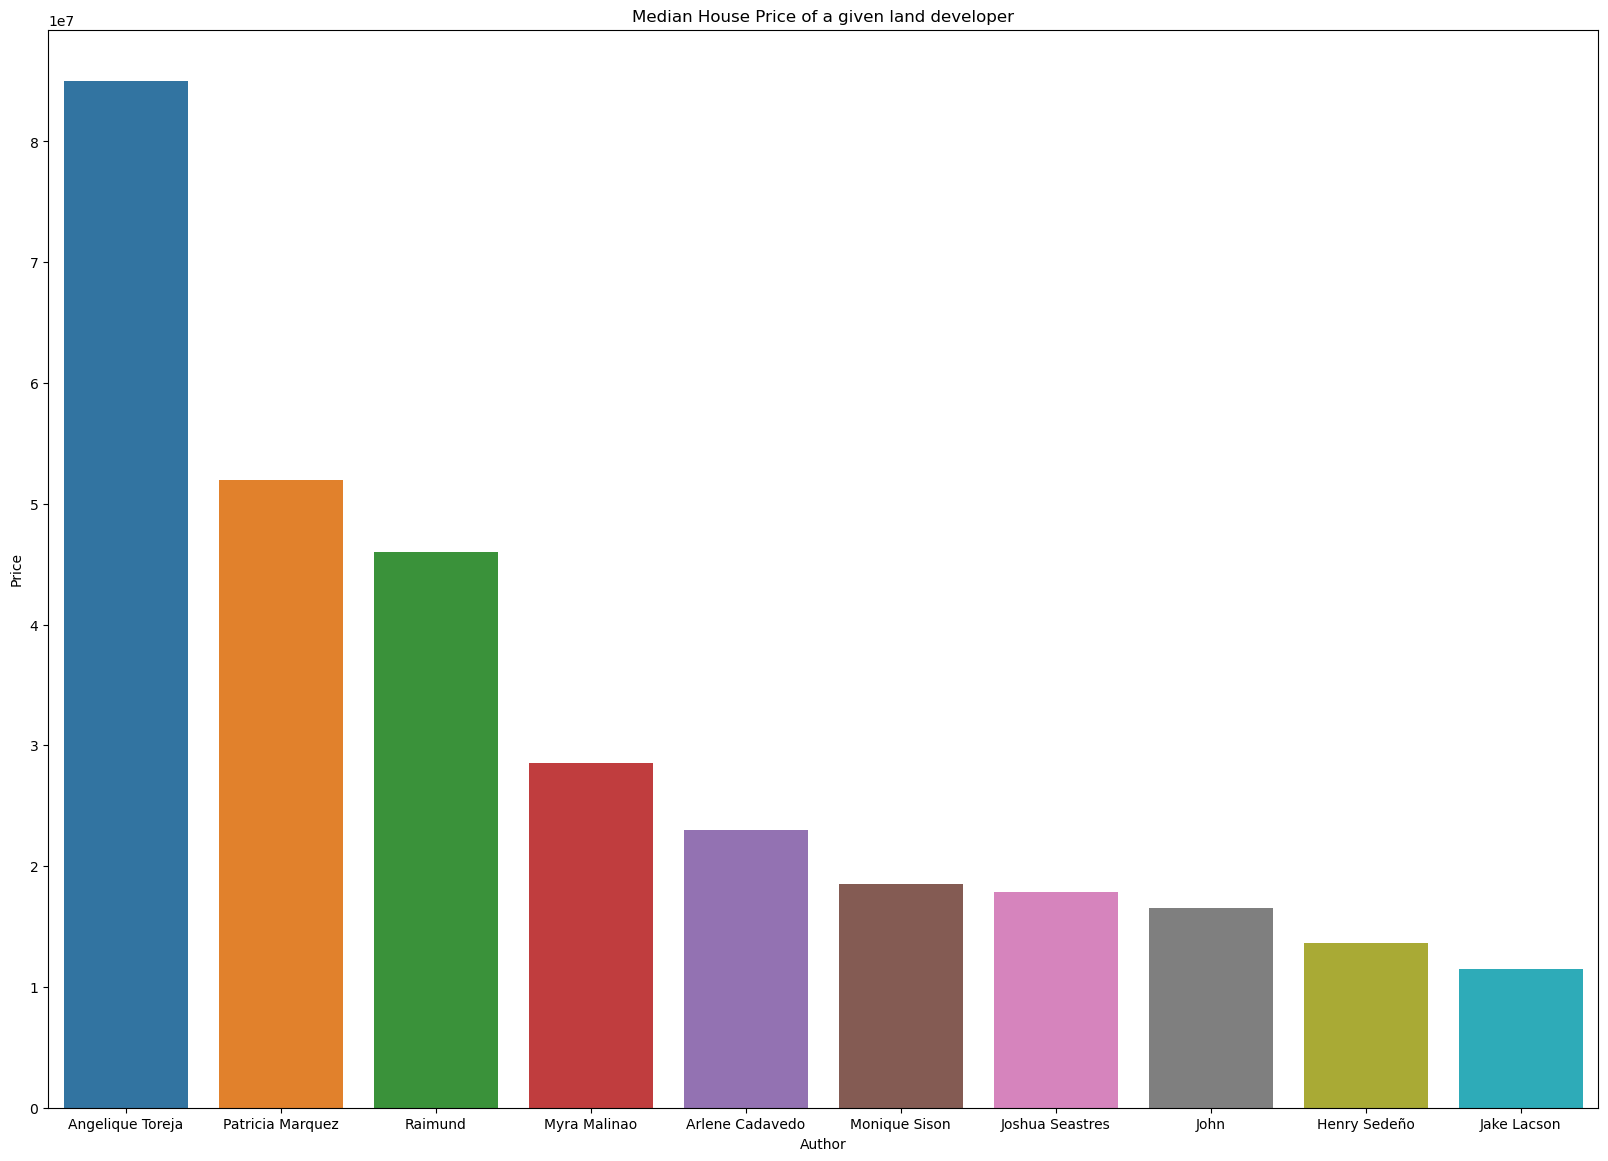

In [33]:
plt.figure(figsize=(20,14))
sns.barplot(x = r2author["Author"], y=r2author["Price"], dodge=False, ci=None)
plt.xlabel("Author")
plt.ylabel("Price")
plt.title("Median House Price of a given land developer")
plt.show()

#### Findings: 
After getting the top 10 developers from our data, it can be seen that the median prices range from 11.5 mil to 88.5 mill
Angelica Toreja who is top 1 land dev of houses has a median house price of 88.5 mil 


#### Condo

In [34]:
r2author_c = df[df.Type == "Condo"]
top_ten_c = r2author_c["Author"].value_counts().index[:10]
top_ten_c

top_ten_c_df = r2author_c[r2author_c['Author'].isin(top_ten)]
top_ten_c_df

r2author_c = top_ten_c_df.groupby('Author')['Price'].median().sort_values(ascending=False).reset_index()
r2author_c

,Author,Price
0,Patricia Marquez,33000000.0
1,Angelique Toreja,21500000.0
2,Jake Lacson,13750000.0
3,Raimund,12105000.0
4,Joshua Seastres,6501500.0
5,Henry Sedeño,2000000.0


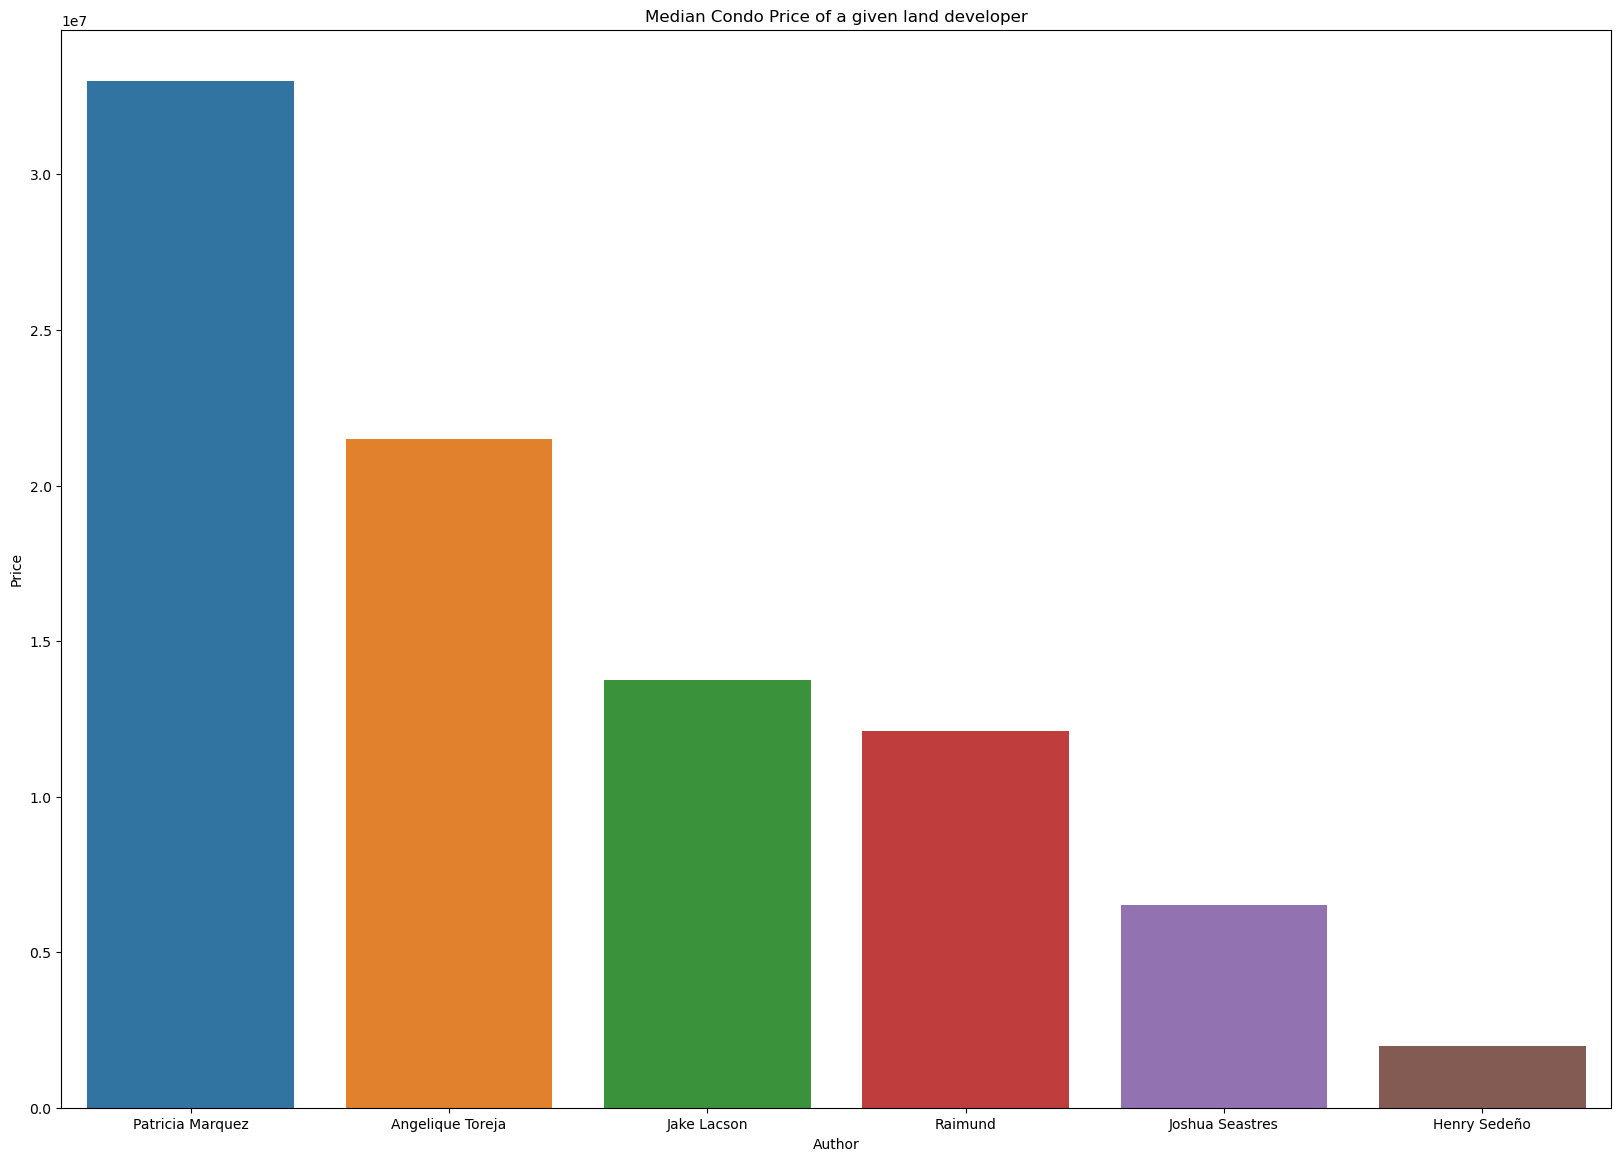

In [35]:
plt.figure(figsize=(20,14))
sns.barplot(x = r2author_c["Author"], y=r2author_c["Price"], dodge=False, ci=None)
plt.xlabel("Author")
plt.ylabel("Price")
plt.title("Median Condo Price of a given land developer")
plt.show()

#### Findings: 
After following a similar process, the top 10 land developer, it can be seen that the median prices range from 2 mil to 33 mill. 
Patricia marques who is the top 1 developer has the median price of 33 mil

### EDA#5: Does nearby places of the condo affect its pricing? 

In [36]:
nearby_places = list(set(sum([x for x in df['Nearby Places']], [])))
len(nearby_places)

4

In [37]:
one_hot_encoded_np = df.copy()
for i in nearby_places:
    one_hot_encoded_np.insert(loc=len(one_hot_encoded_np.columns), column=i, value = 0)

In [38]:
for n_p in nearby_places:
    one_hot_encoded_np[n_p] = one_hot_encoded_np.apply(lambda x: 1 if n_p in x['Nearby Places'] else 0, axis=1)

In [39]:
# filter to condos, since only those has nearby places
one_hot_encoded_np = one_hot_encoded_np[one_hot_encoded_np['Type'] == 'Condo']

In [40]:
one_hot_encoded_np[nearby_places].sum().sort_values(ascending=False)

Hospital              1022
Mall                   984
School                 934
Transportation hub     834
dtype: int64

In [50]:
r3_1 = one_hot_encoded_np[one_hot_encoded_np['Price'] > np.median(df['Price'])][nearby_places].sum().sort_values(ascending=False).reset_index()
r3_1.columns =['nearby_places', 'High']
r3_1

,nearby_places,High
0,Hospital,370
1,Mall,361
2,School,319
3,Transportation hub,303


In [51]:
r3_2 = one_hot_encoded_np[df['Price'] < np.median(df['Price'])][nearby_places].sum().sort_values(ascending=False).reset_index()
r3_2.columns =['nearby_places', 'Low']
r3_2

C:\Users\tiucz\AppData\Local\Temp\ipykernel_10320\2400524402.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  r3_2 = one_hot_encoded_np[df['Price'] < np.median(df['Price'])][nearby_places].sum().sort_values(ascending=False).reset_index()


,nearby_places,Low
0,Hospital,652
1,Mall,623
2,School,615
3,Transportation hub,531


In [52]:
r3_df = pd.merge(r3_1, r3_2, how='inner', on = 'nearby_places')
r3_df

,nearby_places,High,Low
0,Hospital,370,652
1,Mall,361,623
2,School,319,615
3,Transportation hub,303,531


<AxesSubplot:xlabel='nearby_places'>

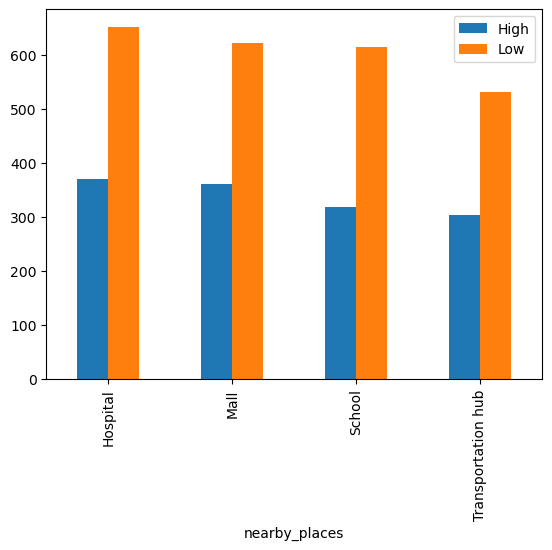

In [53]:
r3_df.plot(x="nearby_places", y=["High", "Low"], kind="bar")

#### Findings:
Based on our data, there are fewer high priced condos that are nearer to hospitals, mall, schools, and transportation hub. 

### EDA#6: Correlation of features that exist on high-price range condo?

### Filter High Prices (based on median price)

In [54]:
high_prices = df[df['Price'] > np.median(df['Price'])]
print(len(high_prices), '/', len(df))

1132 / 2264


### Features/Facilities 

In [55]:
unique_features = list(set(sum([x for x in high_prices['Features']], [])))
unique_facilities = list(set(sum([x for x in high_prices['Facilities']], [])))
feature_facilities = list(set(unique_features + unique_facilities))
len(feature_facilities)

57

In [56]:
one_hot_encoded_ff = high_prices.copy()
for i in feature_facilities:
    one_hot_encoded_ff.insert(loc=len(one_hot_encoded_ff.columns), column=i, value = 0)

In [57]:
for ff in feature_facilities:
    one_hot_encoded_ff[ff] = one_hot_encoded_ff.apply(lambda x: 1 if ff in x['Features'] or ff in x['Facilities'] else 0, axis=1)

In [58]:
# Drop un-used columns
one_hot_encoded_ff = one_hot_encoded_ff.drop(columns =['Name', 'Address', 'Author', 'Price', 'Bedrooms', 'Showers', 'Parking', 'Furnish', 'Total Developed', 'Features', 'Facilities', 'Nearby Places', 'URL', 'Timestamp', 'NFeatures', 'NFacilities', 'NNearby Places'], axis=1)

In [59]:
r4_ff_house = one_hot_encoded_ff[one_hot_encoded_ff.Type == "Condo"]
r4_ff_house

,City,Region,Island,Type,Fully Fenced,Helipad,Balcony,Outdoor Area,Restaurants and/or Bars,Floorboards,...,Dirty Kitchen,Standby Power Generator,Gated Entrance,Pool,Laundry Area,Sauna,Garbage Chute,Lobby,Retail spaces,Ensuite
0,Pasig,National Capital Region,Luzon,Condo,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,Taguig,National Capital Region,Luzon,Condo,0,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,1
3,Mandaluyong,National Capital Region,Luzon,Condo,0,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,1
4,Pasig,National Capital Region,Luzon,Condo,0,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,1
5,Pasig,National Capital Region,Luzon,Condo,0,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,Mandaluyong,National Capital Region,Luzon,Condo,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2467,Mandaluyong,National Capital Region,Luzon,Condo,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2468,Mandaluyong,National Capital Region,Luzon,Condo,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2484,Mandaluyong,National Capital Region,Luzon,Condo,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1


##### Grouping of Features/Facilities


##### room_list 
['Security', 'Ensuite', 'Fiber ready', 'Maid’s Room', 'Gated', 'Maid’s Quarters', 'Floorboards', 'Balcony', 'Dirty Kitchen', 'Water Feature', 'Built-in wardrobes', 'Utility Room']
##### appliance_list
['Stove/Burner', 'WiFi', 'CCTV', 'Hot Tub', 'Range Hood', 'Central air conditioning', 'Garbage Chute']
##### condo_provided 
['Pool', 'Court', 'Garden/Lanai', 'Outdoor Area', 'Lounge', 'Lobby', 'Roof Deck', 'Golf Course', 'Restaurants and/or Bars', 'Sauna', 'Pets Allowed', 'Laundry station', 'Laundry Area', 'Mailbox Area', 'Fully Fenced', 'Amenity Deck', 'Helipad']
##### property_exclusive
['Co-working Space', 'Entertainment Area', 'Building Reception Area', 'Function Room', 'Clubhouse', 'Club House', 'Conference Room', 'Gazebo']
##### external_list
['Connected to mall', 'Yoga Studio', 'Garage Space', 'Daycare', 'Retail Area', 'Jogging Path', 'Play Area', 'Fitness Center']

In [60]:
room_list = ['Security', 'Ensuite', 'Fiber ready', 'Maid’s Room', 'Gated', 'Maid’s Quarters', 'Floorboards', 'Balcony', 'Dirty Kitchen', 'Water Feature', 'Built-in wardrobes', 'Utility Room']
appliance_list = ['Stove/Burner', 'WiFi', 'CCTV', 'Hot Tub', 'Range Hood', 'Central air conditioning', 'Garbage Chute']
condo_provided = ['Pool', 'Court', 'Garden/Lanai', 'Outdoor Area', 'Lounge', 'Lobby', 'Roof Deck', 'Golf Course', 'Restaurants and/or Bars', 'Sauna', 'Pets Allowed', 'Laundry station', 'Laundry Area', 'Mailbox Area', 'Fully Fenced', 'Amenity Deck', 'Helipad']
property_exclusive = ['Co-working Space', 'Entertainment Area', 'Building Reception Area', 'Function Room', 'Clubhouse', 'Club House', 'Conference Room', 'Gazebo']
external_list = ['Connected to mall', 'Yoga Studio', 'Garage Space', 'Daycare', 'Retail Area', 'Jogging Path', 'Play Area', 'Fitness Center']


In [61]:
r4_ff_house['Room'] = r4_ff_house.loc[:,room_list].sum(axis=1)
r4_ff_house['Appliance'] = r4_ff_house.loc[:,appliance_list].sum(axis=1)
r4_ff_house['Condo-Provide'] = r4_ff_house.loc[:,condo_provided].sum(axis=1)
r4_ff_house['Property-Exclusive'] = r4_ff_house.loc[:,property_exclusive].sum(axis=1)
r4_ff_house['External'] = r4_ff_house.loc[:,external_list].sum(axis=1)

r4_ff_house = r4_ff_house[['Room', 'Appliance', 'Condo-Provide', 'Property-Exclusive', 'External']]
r4_ff_house

C:\Users\tiucz\AppData\Local\Temp\ipykernel_10320\1869938918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r4_ff_house['Room'] = r4_ff_house.loc[:,room_list].sum(axis=1)
C:\Users\tiucz\AppData\Local\Temp\ipykernel_10320\1869938918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r4_ff_house['Appliance'] = r4_ff_house.loc[:,appliance_list].sum(axis=1)
C:\Users\tiucz\AppData\Local\Temp\ipykernel_10320\1869938918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Room,Appliance,Condo-Provide,Property-Exclusive,External
0,1,3,4,3,2
2,8,4,7,3,3
3,7,4,7,4,3
4,7,2,5,3,4
5,7,2,5,3,4
...,...,...,...,...,...
2465,2,1,2,2,2
2467,1,1,2,2,2
2468,2,1,2,2,2
2484,3,2,3,1,1


Text(0.5, 1.0, 'Correlation of feature/facilities that exist on high-price range condo')

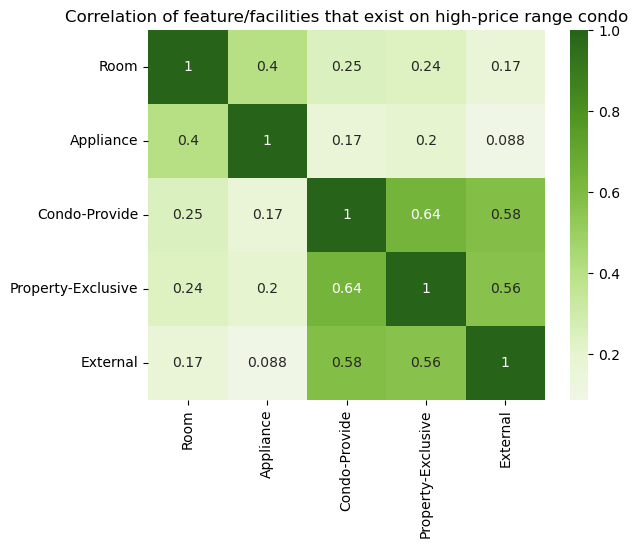

In [62]:
sns.heatmap(r4_ff_house.corr(), annot=True, center=0, cmap='PiYG')
plt.title("Correlation of feature/facilities that exist on high-price range condo")

#### Findings: 
Since there are 52 features, we have divided them into 5 groups namely: Room, Appliance, condo provide, Property-exclusive, and external. Based on the heatmap presented, it can be seen that the correlation between the features are as follows: 
- The corrrelation of a condo-provided feature/facility and an property-exclusive provided feature/facility is 0.64 – meaning the chances of having this two together in a high-price range condo

- Aside from that, the rest of the group of features shows little correlation between each other as they are getting closer to the value of zero.


### EDA#7: Correlation of nearby places that exist on high-price range houses

### Nearby Places [add visualization here, most prob barplot]

In [63]:
nearby_places = list(set(sum([x for x in high_prices['Nearby Places']], [])))
len(nearby_places)

4

In [64]:
one_hot_encoded_np = high_prices.copy()
for i in nearby_places:
    one_hot_encoded_np.insert(loc=len(one_hot_encoded_np.columns), column=i, value = 0)

In [65]:
for n_p in nearby_places:
    one_hot_encoded_np[n_p] = one_hot_encoded_np.apply(lambda x: 1 if n_p in x['Nearby Places'] else 0, axis=1)

In [66]:
# drop un-used columns
one_hot_encoded_np = one_hot_encoded_np.drop(columns =['Name', 'Address', 'Author', 'Price', 'Bedrooms', 'Showers', 'Parking', 'Furnish', 'Total Developed', 'Features', 'Facilities', 'Nearby Places', 'URL', 'Timestamp', 'NFeatures', 'NFacilities', 'NNearby Places'], axis=1)

In [67]:
# filter to condos, since only those has nearby places
one_hot_encoded_np = one_hot_encoded_np[one_hot_encoded_np['Type'] == 'Condo']

In [68]:
r4_near_condo= one_hot_encoded_np[['Hospital', 'School', 'Transportation hub', 'Mall']]

Text(0.5, 1.0, 'Correlation of nearby places that exist on high-price range condo')

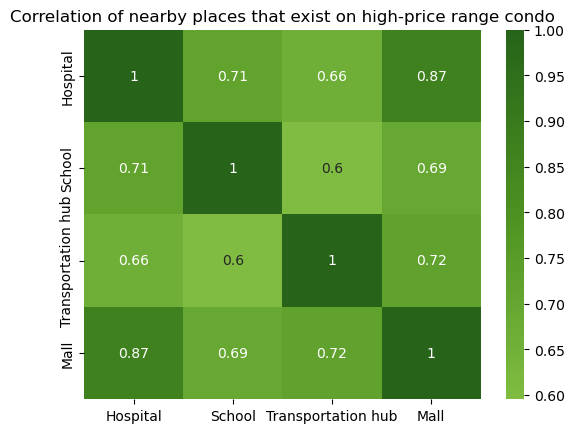

In [69]:
sns.heatmap(r4_near_condo.corr(), annot=True, center=0, cmap='PiYG')
plt.title("Correlation of nearby places that exist on high-price range condo")

#### Findings: 
Based on the data gathered, it can be seen that the correlation between the nearby places that exist on a high range houses are as follows: 
- The correlation of having a mall and a transportation hub is 0.72

- Meaning that there is a higher chance that if there is a mall nearby a high-price range house then there is also a transportation hub


### EDA#8: What is the median size of houses (in square meters) per city, region and island?

#### City

In [70]:
r5 = df[df.Type == "House"]
r5city = r5.groupby(['Type', 'Island', 'City'])['Total Developed'].median().sort_values(ascending=False).reset_index()
r5city

,Type,Island,City,Total Developed
0,House,Luzon,Silang,725.0
1,House,Luzon,Biñan,470.0
2,House,Luzon,Muntinlupa,455.0
3,House,Luzon,Taguig,410.0
4,House,Luzon,Tagaytay,400.0
...,...,...,...,...
58,House,Luzon,Cabanatuan,50.0
59,House,Luzon,Tanza,48.0
60,House,Luzon,San Jose Del Monte,44.0
61,House,Luzon,Pandi,42.0


In [71]:
r5luzon = r5city[r5city.Island == "Luzon"]
r5_luzon_ten = r5luzon.head(10)
r5_luzon_ten

,Type,Island,City,Total Developed
0,House,Luzon,Silang,725.0
1,House,Luzon,Biñan,470.0
2,House,Luzon,Muntinlupa,455.0
3,House,Luzon,Taguig,410.0
4,House,Luzon,Tagaytay,400.0
6,House,Luzon,Lapu-Lapu,400.0
7,House,Luzon,Makati,390.5
9,House,Luzon,Manila,364.0
10,House,Luzon,Quezon,362.5
11,House,Luzon,Parañaque,350.0


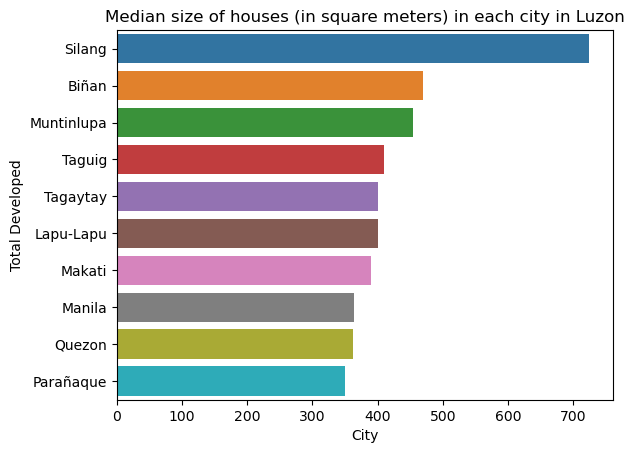

In [72]:
sns.barplot(x=r5_luzon_ten["Total Developed"] , y=r5_luzon_ten["City"], dodge=False, ci=None)
plt.xlabel("City")
plt.ylabel("Total Developed")
plt.title("Median size of houses (in square meters) in each city in Luzon")
plt.show()

In [73]:
r5visayas = r5city[r5city.Island == "Visayas"]
r5_visayas_ten = r5visayas.head(10)
r5_visayas_ten

,Type,Island,City,Total Developed
5,House,Visayas,Cebu,400.0
8,House,Visayas,Dauin,389.0
17,House,Visayas,Dumaguete,263.0
20,House,Visayas,Talisay,226.5
21,House,Visayas,Negros Island Region,225.0
26,House,Visayas,Bacong,205.0
27,House,Visayas,Consolacion,183.0
30,House,Visayas,Danao,155.0
36,House,Visayas,Sibulan,135.0
37,House,Visayas,Mandaue,124.5


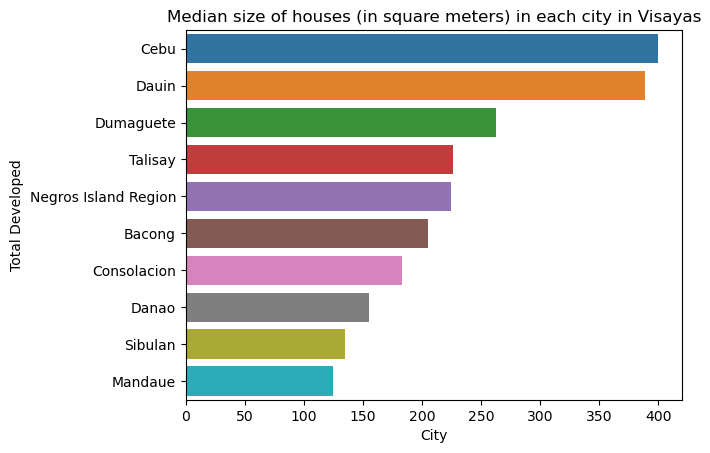

In [74]:
sns.barplot(x=r5_visayas_ten["Total Developed"] , y=r5_visayas_ten["City"], dodge=False, ci=None)
plt.xlabel("City")
plt.ylabel("Total Developed")
plt.title("Median size of houses (in square meters) in each city in Visayas")
plt.show()

In [75]:
r5mindanao = r5city[r5city.Island == "Mindanao"]
r5_mindanao_ten = r5mindanao.head(10)
r5_mindanao_ten

,Type,Island,City,Total Developed
12,House,Mindanao,Valencia,300.0


#### Findings:
Among all the cities in Luzon, botolan has the largest median size in houses and among all the cities in Visayas, cebu has the largest median size in houses


#### Region

In [76]:
r5region = r5.groupby(['Type', 'Region'])['Total Developed'].median().sort_values(ascending=False).reset_index()
r5region 

,Type,Region,Total Developed
0,House,National Capital Region,330.5
1,House,Cordillera Administrative Region,300.0
2,House,Northern Mindanao,300.0
3,House,Central Visayas,225.0
4,House,Calabarzon,121.0
5,House,Western Visayas,107.0
6,House,Central Luzon,65.5


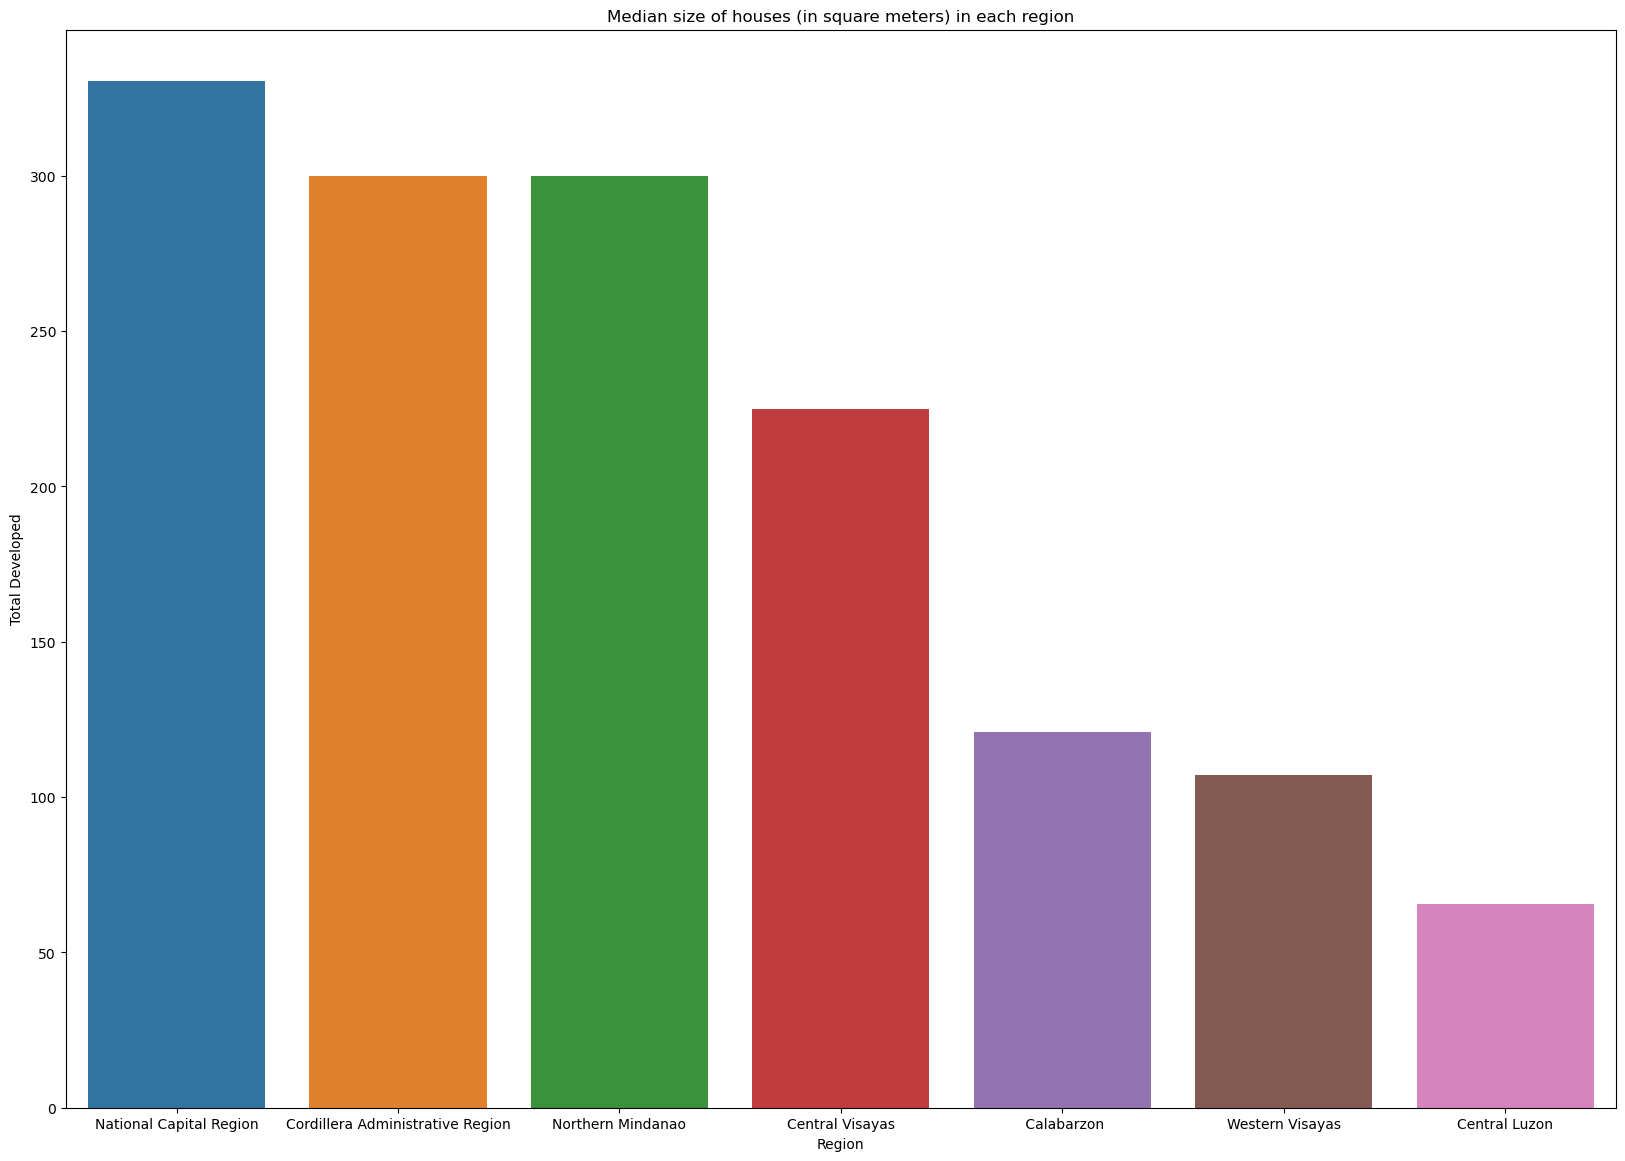

In [77]:
plt.figure(figsize=(20,14))
sns.barplot(x=r5region["Region"], y=r5region["Total Developed"], dodge=False, ci=None)
plt.xlabel("Region")
plt.ylabel("Total Developed")
plt.title("Median size of houses (in square meters) in each region")
plt.show()

#### Findings: 
Grouping the data by region,  we can see that cordillera administrative region has the largest median size in houses


#### Island

In [78]:
r5island = r5.groupby(['Type', 'Island'])['Total Developed'].median().sort_values(ascending=False).reset_index()
r5island

,Type,Island,Total Developed
0,House,Mindanao,300.0
1,House,Luzon,268.0
2,House,Visayas,224.5


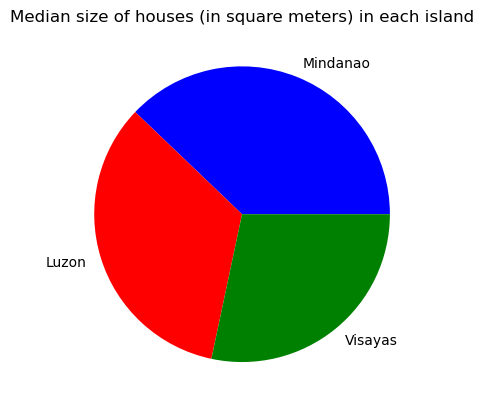

In [79]:
plt.pie(r5island["Total Developed"], labels = r5island["Island"], colors=[colors[v] for v in r5island["Island"].value_counts().keys()])
plt.title("Median size of houses (in square meters) in each island")
plt.show()

#### Findings: 
Grouping the data by island, we can see that Mindanao has the largest median size in houses 
